In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


import zipfile, os, shutil

dataset = '/content/gdrive/My Drive/colab/subset2.zip'
dst_path = '/content/subset2'
dst_file = os.path.join(dst_path, 'subset2.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.applications import DenseNet169

conv_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

51879936/51877672 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu') )
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(40, activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
import os 
import numpy as np 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')

Found 1967 images belonging to 40 classes.
Found 533 images belonging to 40 classes.


In [ ]:

def split_feature_label(directory):
  i=1
  for inputs_batch, labels_batch in validation_generator:
    features_batch = inputs_batch
    print(i)
    i=i+1
    
  return features_batch, labels_batch

validation_features, validation_labels = split_feature_label(validation_dir)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
25840
25841
25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
2585

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/exp/model.{epoch:02d}.hdf5'
modelckpt = ModelCheckpoint(filepath=filepath)

model.compile(optimizer=optimizers.RMSprop(), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=10, 
                    batch_size=20, 
                    validation_data=validation_generator,
                    callbacks=[modelckpt])

Epoch 1/10
99/99 [==============================] - 194s 2s/step - loss: 5.6675 - acc: 0.1088 - val_loss: 3.9114 - val_acc: 0.1670
Epoch 2/10
99/99 [==============================] - 195s 2s/step - loss: 3.0763 - acc: 0.2084 - val_loss: 2.0043 - val_acc: 0.4522
Epoch 3/10
99/99 [==============================] - 191s 2s/step - loss: 2.7203 - acc: 0.2710 - val_loss: 2.0001 - val_acc: 0.4315
Epoch 4/10
99/99 [==============================] - 190s 2s/step - loss: 2.5102 - acc: 0.2964 - val_loss: 1.6993 - val_acc: 0.5066
Epoch 5/10
99/99 [==============================] - 194s 2s/step - loss: 2.3603 - acc: 0.3244 - val_loss: 1.8307 - val_acc: 0.5066
Epoch 6/10
99/99 [==============================] - 190s 2s/step - loss: 2.2459 - acc: 0.3625 - val_loss: 1.4082 - val_acc: 0.6154
Epoch 7/10
99/99 [==============================] - 191s 2s/step - loss: 2.2353 - acc: 0.3472 - val_loss: 1.4763 - val_acc: 0.5685
Epoch 8/10
99/99 [==============================] - 194s 2s/step - loss: 2.1352 - a

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.models import load_model
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
import glob

Using TensorFlow backend.


In [20]:
from tensorflow.keras import models
best_model_path = '/content/gdrive/My Drive/densenet_aug/model.05.hdf5'
model = models.load_model(best_model_path)

In [6]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [29]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

#직접 찍은 이미지로 테스트 해보기
#이미지 업로드 및 전처리
uploaded=files.upload()
img = Image.open(BytesIO(uploaded['당근.jpg'])).resize((150, 150)) # 이미지 불러오기 및 resize
img_arr = np.asarray(img)[:, :, :3] / 255 # 정규화
img_array2 = np.expand_dims(img_arr, 0) # 입력 형태를 맞춰주기 위해 차원 추가, 즉 [1, 160, 160, 3] 형태임


Saving 당근.jpg to 당근 (1).jpg


In [4]:
pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 2.0MB 43.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=29c106665fcc0867c4a9e529410602648ac6b97815f9bddfc0e5e1b3cf7e6dba
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


[1.6160341e-03 2.1834506e-04 5.3397179e-02 2.4256237e-01 4.5792191e-04
 1.7629916e-02 7.3701471e-05 7.2623778e-05 3.5301056e-02 3.2622469e-04
 1.4108229e-04 2.4406842e-03 1.9223617e-02 2.7803454e-04 9.3218992e-03
 2.2353671e-02 4.8586719e-02 5.6125806e-04 5.8842204e-03 7.4559987e-02
 7.3732864e-03 3.3063188e-03 1.4384199e-02 1.7010083e-03 9.1834106e-03
 1.0855513e-01 2.5238587e-02 1.2612821e-01 1.4680538e-04 4.8057448e-02
 3.9119489e-02 2.0133900e-03 4.8804460e-03 1.2138761e-02 3.7052008e-04
 7.5555465e-05 2.7117008e-04 6.3018029e-04 1.0546390e-03 6.0364909e-02]
7


2.0

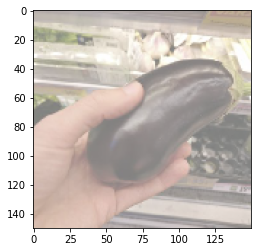

In [ ]:
'''
images = X
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = model.predict(images)
print(preds[0])
index_min = np.argmin(preds[0])
print(index_min)
y[0]
'''

In [7]:
explainer = lime_image.LimeImageExplainer(random_state=42)

In [21]:
# image : 설명하고자 하는 이미지입니다.
# predict_fn : 위에서 만든 예측 모델 함수입니다.
# hide_color=0 : superpixel을 회색으로 가리겠다는 뜻입니다. 이 인자가 없을 경우 픽셀들 색깔의 평균으로 가려집니다.
# 아래 코드를 실행시킬 때 시간이 다소 걸릴 수 있습니다.

X=img_array
explanation = explainer.explain_instance(X[0], model, hide_color=0, top_labels=5, num_samples=1000)


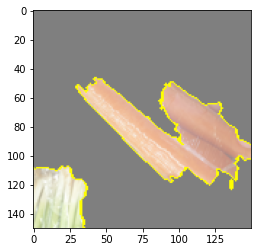

In [22]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

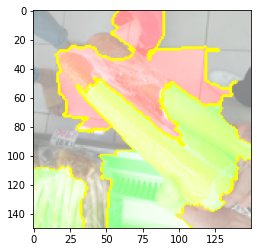

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [24]:
explanation.top_labels[0]

10

In [30]:
preds = model.predict(img_array2)
print(preds[0])
index_max = np.argmax(preds[0])
print(index_max)

[0.0059868  0.01746436 0.12153778 0.00089713 0.0016901  0.00632579
 0.00788825 0.11936159 0.09145491 0.02421167 0.17274241 0.01218905
 0.00355599 0.0347637  0.0016544  0.00219201 0.00039345 0.02771086
 0.02643989 0.00451714 0.01390675 0.02297488 0.00499913 0.0071244
 0.00304951 0.02052319 0.01361473 0.00629917 0.00297224 0.00876259
 0.04267448 0.00513883 0.0131036  0.04258465 0.01292659 0.01327523
 0.00319086 0.01490999 0.00109972 0.06389218]
10
